In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

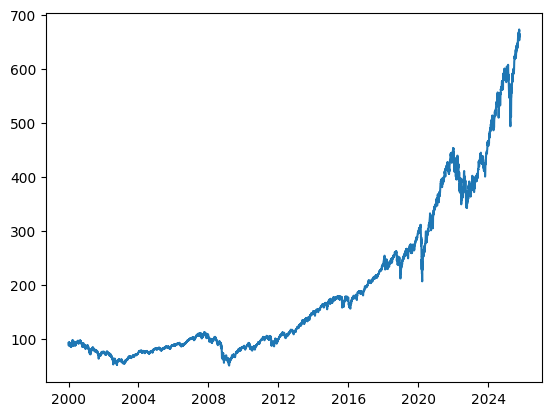

In [33]:
df = yf.download('SPY', start = '2000-01-01')

plt.plot(df['Close'])

In [34]:
df['MA'] = df['Close'].rolling(50).mean()
df

Price,Close,High,Low,Open,Volume,MA
Ticker,SPY,SPY,SPY,SPY,SPY,
Date,,,,,,
2000-01-03,91.887749,93.664693,90.900558,93.664693,8164300,NaN
2000-01-04,88.294403,91.019051,88.225300,90.683406,8089800,NaN
2000-01-05,88.452370,89.419817,86.714912,88.412882,12177900,NaN
2000-01-06,87.030800,89.400059,87.030800,88.215430,6227200,NaN
2000-01-07,92.085197,92.085197,88.491821,88.649772,8066500,NaN
...,...,...,...,...,...,...
2025-10-10,653.020020,673.950012,652.840027,672.130005,159422600,650.065831
2025-10-13,663.039978,665.130005,659.770020,660.650024,79560500,650.926610


/var/folders/yl/gn9fldpj69169vhn466y4klh0000gn/T/ipykernel_5846/3727900794.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('SPY', start='2000-01-01')
[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'SPY Close vs. Moving Average')

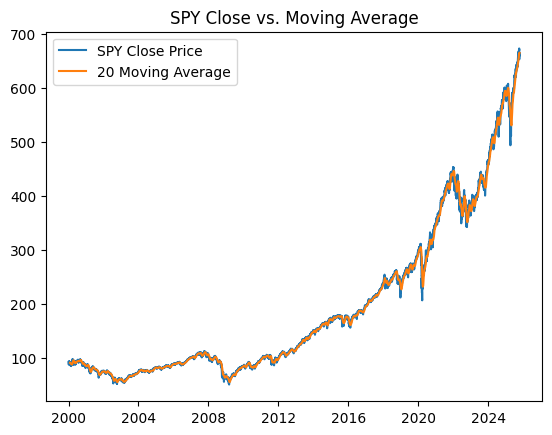

In [35]:
TICKER = 'SPY'
WINDOW = 20

df = yf.download('SPY', start='2000-01-01')
df['MA'] = df['Close'].rolling(WINDOW).mean()

plt.plot(df['Close'])
plt.plot(df['MA'])
plt.legend([f'{TICKER} Close Price', f'{WINDOW} Moving Average'])
plt.title(f'{TICKER} Close vs. Moving Average')


In [36]:
df


Price,Close,High,Low,Open,Volume,MA
Ticker,SPY,SPY,SPY,SPY,SPY,
Date,,,,,,
2000-01-03,91.887787,93.664732,90.900595,93.664732,8164300,NaN
2000-01-04,88.294365,91.019012,88.225262,90.683367,8089800,NaN
2000-01-05,88.452347,89.419794,86.714890,88.412859,12177900,NaN
2000-01-06,87.030777,89.400036,87.030777,88.215406,6227200,NaN
2000-01-07,92.085243,92.085243,88.491865,88.649816,8066500,NaN
...,...,...,...,...,...,...
2025-10-10,653.020020,673.950012,652.840027,672.130005,159422600,664.226224
2025-10-13,663.039978,665.130005,659.770020,660.650024,79560500,664.424088


In [37]:
df.columns = df.columns.get_level_values(0)
df

Price,Close,High,Low,Open,Volume,MA
Date,,,,,,
2000-01-03,91.887787,93.664732,90.900595,93.664732,8164300,NaN
2000-01-04,88.294365,91.019012,88.225262,90.683367,8089800,NaN
2000-01-05,88.452347,89.419794,86.714890,88.412859,12177900,NaN
2000-01-06,87.030777,89.400036,87.030777,88.215406,6227200,NaN
2000-01-07,92.085243,92.085243,88.491865,88.649816,8066500,NaN
...,...,...,...,...,...,...
2025-10-10,653.020020,673.950012,652.840027,672.130005,159422600,664.226224
2025-10-13,663.039978,665.130005,659.770020,660.650024,79560500,664.424088
2025-10-14,662.229980,665.830017,653.169983,657.169983,88779600,664.626825


In [42]:
def add_ma_strategy(df):
    df['Strategy'] = np.where(df['Close'] > df['MA'], 1, -1)
    return df

df = add_ma_strategy(df)
df['asset_cumulative'] = np.cumprod(1 + df['Close'].pct_change()) - 1 
df['strategy_cumulative'] = np.cumprod(1 + df['Close'].pct_change() * df['Strategy'].shift()) - 1




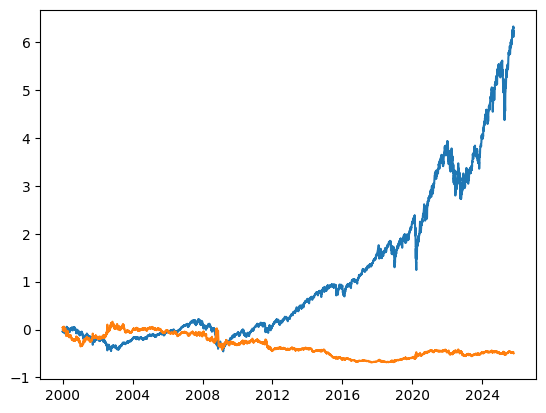

In [44]:
plt.plot(df['asset_cumulative'])
plt.plot(df['strategy_cumulative'])

/var/folders/yl/gn9fldpj69169vhn466y4klh0000gn/T/ipykernel_5846/2027514749.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, start = '2000-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,MA,Strategy,asset_cumulative,strategy_cumulative
Date,,,,,,,,,
2000-01-03,91.887794,93.664739,90.900603,93.664739,8164300,NaN,NaN,NaN,NaN
2000-01-04,88.294403,91.019051,88.225300,90.683406,8089800,NaN,-1.0,-0.039106,0.039106
2000-01-05,88.452309,89.419756,86.714853,88.412821,12177900,NaN,-1.0,-0.037388,0.037248
2000-01-06,87.030792,89.400052,87.030792,88.215422,6227200,NaN,-1.0,-0.052858,0.053918
2000-01-07,92.085190,92.085190,88.491814,88.649765,8066500,NaN,-1.0,0.002148,-0.007290
...,...,...,...,...,...,...,...,...,...
2025-10-10,653.020020,673.950012,652.840027,672.130005,159422600,664.226224,1.0,6.106711,-0.481551
2025-10-13,663.039978,665.130005,659.770020,660.650024,79560500,664.424088,-1.0,6.215757,-0.489506
2025-10-14,662.229980,665.830017,653.169983,657.169983,88779600,664.626825,-1.0,6.206942,-0.488883


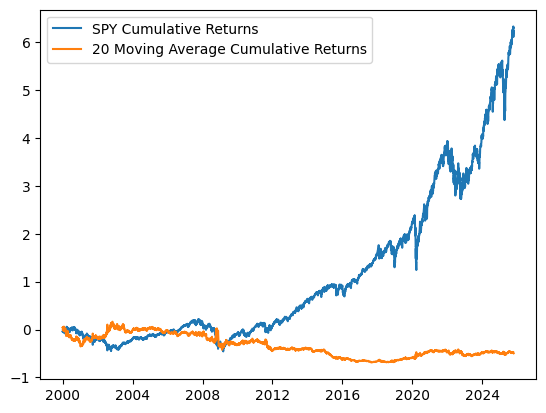

In [56]:
TICKER = 'SPY'
WINDOW = 20

def get_data():
    df = yf.download(TICKER, start = '2000-01-01')
    df['MA'] = df['Close'].rolling(WINDOW).mean()

    df.columns = df.columns.get_level_values(0)
    return df

def add_strategy(df):
    df['Strategy'] = np.where(df['Close'] > df['MA'], 1, - 1)
    df['Strategy'] = df['Strategy'].shift(1)
    return df

def test_strategy(df):
    df['asset_cumulative'] = np.cumprod(1 + df['Close'].pct_change()) - 1 
    df['strategy_cumulative'] = np.cumprod(1 + df['Close'].pct_change() * df['Strategy']) - 1

    plt.plot(df['asset_cumulative'])
    plt.plot(df['strategy_cumulative'])
    plt.legend([f'{TICKER} Cumulative Returns', f'{WINDOW} Moving Average Cumulative Returns'])
    return df

def main(): 
    df = get_data()
    df = add_strategy(df)
    df = test_strategy(df)
    return df

main()



/var/folders/yl/gn9fldpj69169vhn466y4klh0000gn/T/ipykernel_5846/712994177.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, start = '2000-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,10_ma,27_ma,Raw Strategy,Strategy,Asset Returns,Strategy_Returns
Date,,,,,,,,,,,
2024-09-17,554.605530,558.062775,552.359776,556.604982,49321000,545.430579,545.344299,1,1.0,0.000409,0.000409
2024-09-18,552.960693,560.141084,552.399255,555.265483,59044900,546.459869,546.380708,1,1.0,-0.002558,-0.002558
2024-09-19,562.396667,564.268130,559.540298,562.426245,75315500,548.564752,547.756377,1,1.0,0.014462,0.014462
2024-09-20,561.424438,562.471704,558.381417,561.019390,77503100,551.483502,548.776109,1,1.0,0.012709,0.012709
2024-09-23,562.827393,563.479499,561.276243,562.501400,44116900,553.946649,549.785418,1,1.0,0.015239,0.015239
...,...,...,...,...,...,...,...,...,...,...,...
2025-10-13,663.039978,665.130005,659.770020,660.650024,79560500,667.411993,661.125708,1,1.0,0.196005,0.181684
2025-10-14,662.229980,665.830017,653.169983,657.169983,88779600,667.016992,661.747170,1,1.0,0.194544,0.180240
2025-10-15,665.169983,670.229980,658.929993,666.820007,81702600,666.688989,662.418794,1,1.0,0.199847,0.185480


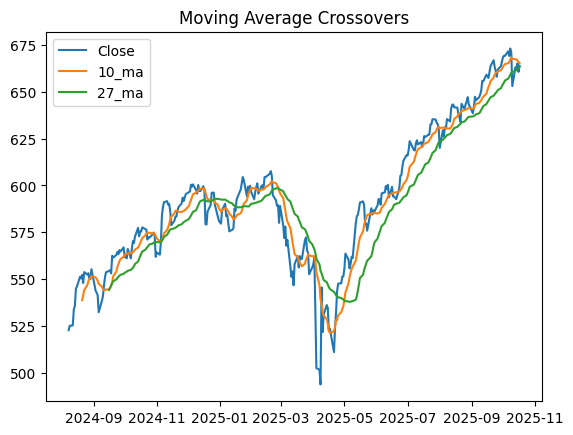

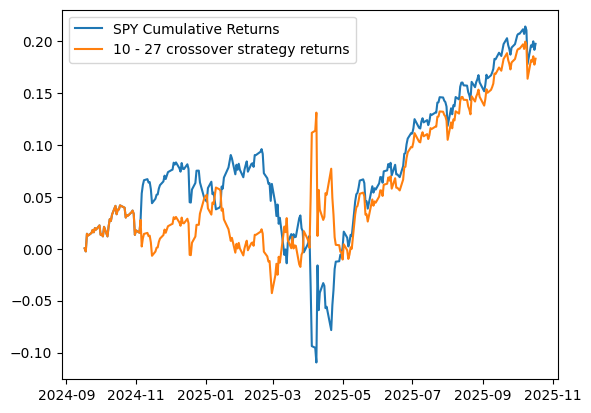

In [74]:
TICKER = 'SPY'
WINDOW = 20
FAST = 10
SLOW = 27
LOOKBACK = 300
def get_data():
    df = yf.download(TICKER, start = '2000-01-01')
    df.columns = df.columns.get_level_values(0)
    return df.iloc[-LOOKBACK:, :]

def add_moving_averages(df, fast, slow):
    df[f'{FAST}_ma'] = df['Close'].rolling(fast).mean()
    df[f'{SLOW}_ma'] =df['Close'].rolling(slow).mean()

    plt.plot(df['Close'])
    plt.plot(df[f'{fast}_ma'])
    plt.plot(df[f'{slow}_ma'])
    
    plt.legend(['Close', f'{FAST}_ma',f'{SLOW}_ma'])
    plt.title('Moving Average Crossovers')
    return df.dropna()

def add_strategy(df, fast, slow):
    # long when fast > slow, short otherwise)
    df['Raw Strategy'] = np.where(df[f'{fast}_ma'] > df[f'{slow}_ma'], 1, -1)
    df['Strategy'] = df['Raw Strategy'].shift(1)
    return df

def test_strategy(df, short, long):
    df['Asset Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Strategy_Returns'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() -1
    
    
    plt.figure()
    plt.plot(df['Asset Returns'])
    plt.plot(df['Strategy_Returns'])
    plt.legend([f'{TICKER} Cumulative Returns', f'{short} - {long} crossover strategy returns'])
    return df.dropna()

df = get_data()
df = add_moving_averages(df, FAST,SLOW)
df = add_strategy(df, FAST, SLOW)
df = test_strategy(df, FAST, SLOW)
df

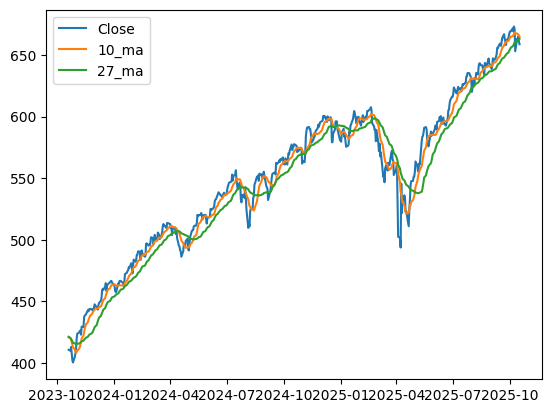

In [65]:
# there are two parts of iloc - rows, columns - separated by a comma
subsection = df.iloc[-500:, :]

plt.plot(subsection['Close'])
plt.plot(subsection[f'{FAST}_ma'])
plt.plot(subsection[f'{SLOW}_ma'])

plt.legend(['Close', f'{FAST}_ma',f'{SLOW}_ma'])
